In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation


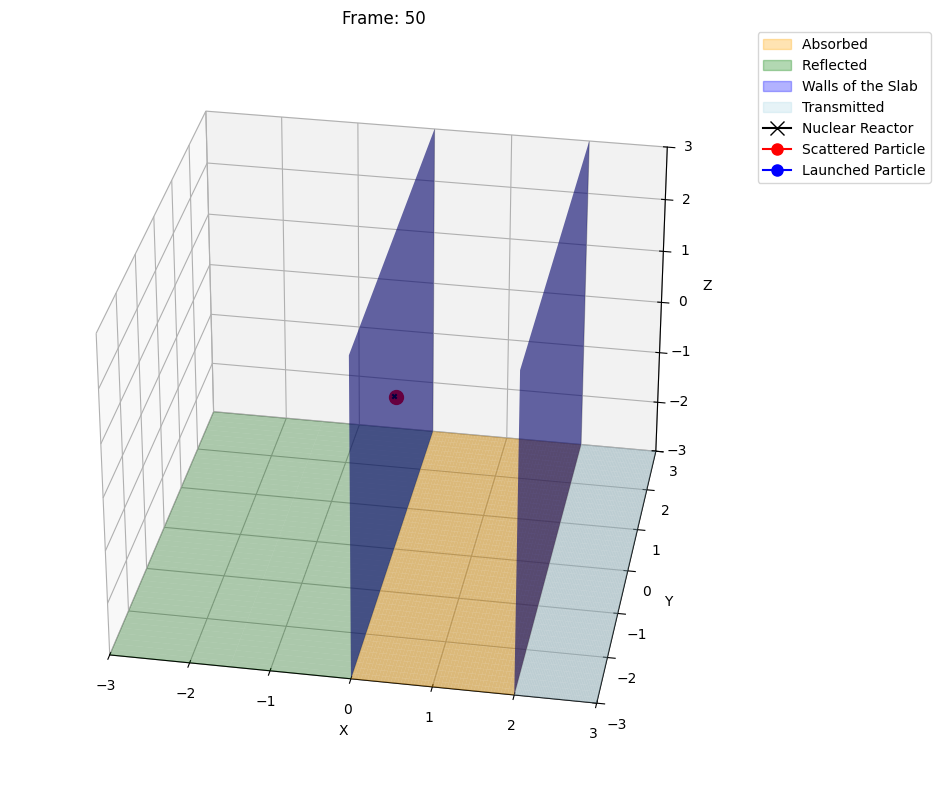

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

# Read the data from the text file
# data = pd.read_csv('output.txt', sep=';', header=None, names=['is_scattered', 'x', 'y', 'z'], nrows=10)
data = pd.read_csv('output.txt', sep=';', header=None, names=['is_scattered', 'x', 'y', 'z'], skiprows=49, nrows=50)

# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')  # Set the figure background to white


# Set axis limits for consistency across frames
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])

THICK = 2

#  Function to create the shield as a wall
def draw_shield():
    # Define the coordinates of the wall (a large plane in Y and Z)
    y = np.linspace(-3, 3, 2)  # Extend Y from -10 to 10
    z = np.linspace(-3, 3, 2)  # Extend Z from -10 to 10
    Y, Z = np.meshgrid(y, z)      # Create a grid in Y and Z
    
    # Plot the two sides of the wall (at X = 0 and X = THICK)
    ax.plot_surface(np.zeros_like(Y), Y, Z, color='blue', alpha=0.6)    # Side at X = 0
    ax.plot_surface(THICK * np.ones_like(Y), Y, Z, color='blue', alpha=0.6)  # Side at X = THICK

def shade_region():
    # Define the grid for X, Y, Z
    x = np.linspace(-3, 0, 3)  # Now X goes from -5 to 0 (since we want to shade x < 0)
    y = np.linspace(-3, 3, 50)
    X, Y = np.meshgrid(x, y)
    
    # Set Z to a constant value (e.g., Z=0 for this plane)
    Z = np.full_like(X, -3)
    
    # Shade the region in light transparent green
    ax.plot_surface(X, Y, Z, color='green', alpha=0.3)
def shade_region_orange():
    # Define the grid for X, Y, Z
    x = np.linspace(0, 2, 50)  # X goes from 0 to 2
    y = np.linspace(-3, 3, 50)  # Simulating "unlimited" Y by using a large range
    X, Y = np.meshgrid(x, y)
    
    # Set Z to a constant value (-3 for this plane)
    Z = np.full_like(X, -3)  # Place the shaded region at z = -3
    
    # Shade the region in orange
    ax.plot_surface(X, Y, Z, color='orange', alpha=0.5)
def shade_region_blue():
    # Define the grid for X, Y, Z
    x = np.linspace(2, 3, 50)  # X goes from 0 to 2
    y = np.linspace(-3, 3, 50)  # Simulating "unlimited" Y by using a large range
    X, Y = np.meshgrid(x, y)
    
    # Set Z to a constant value (-3 for this plane)
    Z = np.full_like(X, -3)  # Place the shaded region at z = -3
    
    # Shade the region in orange
    ax.plot_surface(X, Y, Z, color='lightblue', alpha=0.5)

def create_legend():
    # Define proxy patches for surfaces
    # legend_elements = [
    #     Patch(facecolor='orange', edgecolor='orange',       label='Absorbed ', alpha = 0.3),
    #     Patch(facecolor='green', edgecolor='green',         label='Reflected', alpha = 0.3),
    #     Patch(facecolor='blue', edgecolor='blue',           label='Walls of the Slab', alpha = 0.3),
    #     Patch(facecolor='lightblue', edgecolor='lightblue', label='Transmitted', alpha = 0.3),
    #     # Patch(facecolor='red', edgecolor='red',marker = 'x',             label='Nuclear Reactor'),
    #     Patch(facecolor='red', edgecolor='red',             label='Launched Particle'),
    #     Patch(facecolor='blue', edgecolor='blue',           label='Scattered Particle'),
    # ]
    legend_elements = [
        Patch(facecolor='orange', edgecolor='orange', label='Absorbed ', alpha =0.3),
        Patch(facecolor='green', edgecolor='green', label='Reflected  ', alpha =0.3),
        Patch(facecolor='blue', edgecolor='blue', label='Walls of the Slab', alpha =0.3),
        Patch(facecolor='lightblue', edgecolor='lightblue', label='Transmitted', alpha =0.3),
        Line2D([0], [0], color='black', marker='x', markersize=10, label='Nuclear Reactor'),
        Line2D([0], [0], color='red', marker='o', markersize=8, label='Scattered Particle'),
        Line2D([0], [0], color='blue', marker='o', markersize=8, label='Launched Particle'),
    ]
        # Add the legend outside the plot
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

# Function to update each frame
def update(frame):
    # Clear the previous plot
    ax.cla()
    # Set axis limits again after clearing
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])

    # Read the values from the current frame of data
    is_scattered = data.iloc[frame]['is_scattered']
    x = data.iloc[frame]['x']
    y = data.iloc[frame]['y']
    z = data.iloc[frame]['z']
    
    # Scatter plot if is_scattered is 1, otherwise just a point marker
    if is_scattered == 1:
        ax.scatter(x, y, z, c='r', marker='o', s=100)  # red dot for scatter
    else:
        ax.scatter([x], [y], [z], marker= 'o', color = 'blue', s=100)  # blue point for non-scatter
    
    # Adding labels for clarity
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f"Frame: {frame + 1}")
   

    draw_shield()
    shade_region()
    shade_region_orange()
    shade_region_blue()
    create_legend()
    ax.set_facecolor('white')
    ax.scatter(0, 0, 0, color='black', s=10, marker='x', label="Nuclear Reactor")
    ax.view_init(elev=30, azim = 280)

# Create the animation
ani = FuncAnimation(fig, update, frames=len(data), repeat=False, interval=500)
ani.save('animation.mp4', writer='ffmpeg')
plt.tight_layout()
# Show the plot
plt.show()
